# PYBER ANALYSIS

### Import modules and read in CSV files

In [86]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

file_one = "city_data.csv"
file_two = "ride_data.csv"

city_data = pd.read_csv(file_one)
ride_data = pd.read_csv(file_two)


city_data = city_data.drop_duplicates('city')

### Merge Datasets

In [87]:
c_df = pd.merge(ride_data,city_data, how = 'outer', on = 'city')

### Build Separate Datasets based on City Types

In [88]:
urban_city = c_df.loc[c_df['type'] =='Urban']
rural_city = c_df.loc[c_df['type'] =='Rural']
suburban_city = c_df.loc[c_df['type'] =='Suburban']

In [89]:
# Per city calculations of Average Fare, total Rides and Total Drivers for Urban cities
avg_fare_urban = urban_city.groupby(['city'])['fare'].mean()
total_ride_urban = urban_city.groupby(['city']).count()['ride_id']
total_drivers_urban = urban_city.groupby(['city'])['driver_count'].value_counts()

# Per city calculations of Average Fare, total Rides and Total Drivers for Suburban cities
avg_fare_suburban = suburban_city.groupby(['city'])['fare'].mean()
total_ride_suburban = suburban_city.groupby(['city']).count()['ride_id']
total_drivers_suburban = suburban_city.groupby(['city'])['driver_count'].value_counts()

# Per city calculations of Average Fare, total Rides and Total Drivers for rural cities
avg_fare_rural = rural_city.groupby(['city'])['fare'].mean()
total_ride_rural = rural_city.groupby(['city'])['ride_id'].count()
total_drivers_rural = rural_city.groupby(['city'])['driver_count'].value_counts()

### Build Scatter

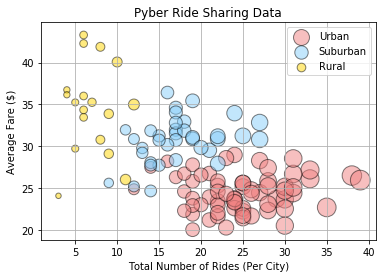

In [90]:
plt.scatter(total_ride_urban, avg_fare_urban, s=total_drivers_urban*10, c = 'lightcoral', marker = 'o', edgecolors = 'black', alpha = 0.5, linewidths = 1, label = 'Urban')
plt.scatter(total_ride_suburban, avg_fare_suburban, s = total_drivers_suburban*10, c = 'lightskyblue', marker = 'o', edgecolors = 'black', alpha = 0.5, linewidths = 1, label = 'Suburban')
plt.scatter(total_ride_rural, avg_fare_rural, s = total_drivers_rural*10, c = 'gold', marker = 'o', edgecolors = 'black', alpha = 0.5, linewidths = 1, label = 'Rural')

plt.title("Pyber Ride Sharing Data")
plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Average Fare ($)")
plt.legend(loc = 'upper right')
plt.grid()
plt.show()

## Total Fares by City Type

([<matplotlib.patches.Wedge at 0x123282a46a0>,
 [Text(-1.0899801368180613, 0.14813271529976368, 'Rural'),
  Text(-0.5606668317230152, -0.9463892982307419, 'Suburban'),
  Text(0.8169317957812442, 0.8789894430774647, 'Urban')],
 [Text(-0.5945346200825787, 0.08079966289078018, '6.8%'),
  Text(-0.30581827184891736, -0.5162123444894956, '30.5%'),
  Text(0.47654354753905903, 0.5127438417951877, '62.7%')])

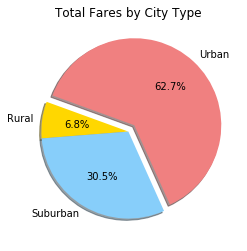

In [91]:
total_fare = c_df.groupby(['type'])['fare'].sum()
labels = ['Rural', 'Suburban', 'Urban']
colors = ['gold', 'lightskyblue', 'lightcoral']
explode = (0,0,0.1)
plt.title("Total Fares by City Type")
plt.pie(total_fare, explode = explode, labels = labels, colors = colors, autopct = "%1.1f%%", shadow = True, startangle = 160)

## Total Rides by City Type

([<matplotlib.patches.Wedge at 0x123284aff98>,
 [Text(-1.0814882142017943, 0.2009558223655489, 'Rural'),
  Text(-0.7597514403856961, -0.7954732860579671, 'Suburban'),
  Text(0.9603490637412989, 0.7195343464847322, 'Urban')],
 [Text(-0.5899026622918878, 0.10961226674484484, '5.3%'),
  Text(-0.414409876574016, -0.433894519667982, '26.3%'),
  Text(0.5602036205157577, 0.4197283687827605, '68.4%')])

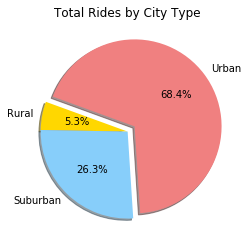

In [92]:
total_rides = c_df.groupby(['type'])['ride_id'].count()
labels = ['Rural', 'Suburban', 'Urban']
colors = ['gold', 'lightskyblue', 'lightcoral']
explode = (0,0,0.1)
plt.title("Total Rides by City Type")
plt.pie(total_rides, explode = explode, labels = labels, colors = colors, autopct = "%1.1f%%", shadow = True, startangle = 160)

## Total Drivers by City Type

(-1.2155634075870576,
 1.2113384995064223,
 -1.134035012314224,
 1.0785783188700298)

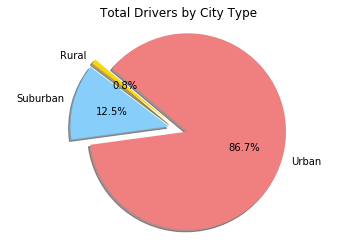

In [93]:
total_drivers = c_df.groupby(['type'])['driver_count'].sum()
labels = ['Rural', 'Suburban', 'Urban']
colors = ['gold', 'lightskyblue', 'lightcoral']
explode = (0.1,0.1,0.1)
plt.title("Total Drivers by City Type")
plt.pie(total_drivers, explode = explode, labels = labels, colors = colors, autopct = "%1.1f%%", shadow = True, startangle = 140)
plt.axis('equal')


In [82]:
### 3 Observations

###1. Urban area has most riders, drivers, and fares
###2. Rural rides account for 5.3% of total rides but 6.8% of fares.  Could conclude demand for drivers is higher thus customers having to pay more.  Another factor could be distance, longer drives in rural areas.
###3. Urban has the most drivers but average fares aren't proportional.  Due to a lot more drivers in urban areas with smaller drive distances.